使用VGG16的結構提取圖像特徵，再根據特徵建立mlp模型，實現貓狗圖像識別。訓練/測試數據: dataset/data_vgg:
1. 對數據進行分離、計算測試數據預測準確率
1. 從網站下載貓/狗圖片，對其進行預測

mlp模型一個隱藏層，10個神經元

In [1]:
# load the data
from keras.utils.image_utils import load_img,img_to_array

img_path = 'dataset/test_set/dog/dog.56.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
type(img)

numpy.ndarray

In [2]:
from keras.applications.vgg16 import VGG16,preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet',include_top=False)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [3]:
# 特徵提取
features = model_vgg.predict(x)
print(features.shape)

1/1 [==============================] - 0s 283ms/step
(1, 7, 7, 512)


In [4]:
# flatten
features = features.reshape(1,25088)
print(features.shape)

(1, 25088)


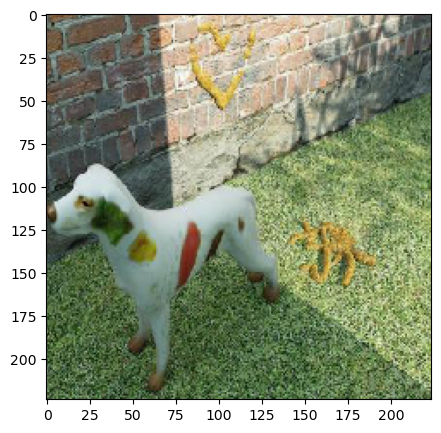

In [5]:
# visualize the data
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
img = load_img(img_path,target_size=(224,224))
plt.imshow(img)

In [6]:
# load image and preprocess it with vgg16 structure
from keras.utils.image_utils import load_img,img_to_array
from keras.applications.vgg16 import VGG16,preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet',include_top=False)
# define a method to load and preprocess the image
def modelProcess(img_path, model):
    img = load_img(img_path,target_size=(224,224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    
    return x_vgg

def flatten(name):
    # list file names if the training datasets
    import os
    folder = f'dataset/data_vgg/{name}'
    dirs = os.listdir(folder)
    # generate path for the images
    img_path = []
    for i in dirs:
        if os.path.splitext(i)[1] == '.jpg':
            img_path.append(i)
    img_path = [folder + '//' + i for i in img_path]

    # preprocess multiple images
    features = np.zeros([len(img_path),25088])
    for i in range(len(img_path)):
        features_i = modelProcess(img_path[i],model_vgg)
        print('preprocessed:',img_path[i])
        features[i] = features_i
    
    return features

features1 = flatten('cat')
features2 = flatten('dog')
# label the results
print(features1.shape,features2.shape)
y1 = np.zeros(300)
y2 = np.ones(300)

# generate the training data
X = np.concatenate((features1,features2), axis=0)
y = np.concatenate((y1,y2), axis=0)
y = y.reshape(-1,1)
print(X.shape, y.shape)

1/1 [==============================] - 0s 275ms/step
preprocessed: dataset/data_vgg/cat//cat.1.jpg
1/1 [==============================] - 0s 182ms/step
preprocessed: dataset/data_vgg/cat//cat.10.jpg
1/1 [==============================] - 0s 152ms/step
preprocessed: dataset/data_vgg/cat//cat.100.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/cat//cat.101.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/cat//cat.102.jpg
1/1 [==============================] - 0s 142ms/step
preprocessed: dataset/data_vgg/cat//cat.103.jpg
1/1 [==============================] - 0s 141ms/step
preprocessed: dataset/data_vgg/cat//cat.104.jpg
1/1 [==============================] - 0s 148ms/step
preprocessed: dataset/data_vgg/cat//cat.105.jpg
1/1 [==============================] - 0s 142ms/step
preprocessed: dataset/data_vgg/cat//cat.106.jpg
1/1 [==============================] - 0s 143ms/step
preprocessed: dataset/data_vgg/cat//cat.1

1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/cat//cat.172.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/cat//cat.173.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/cat//cat.174.jpg
1/1 [==============================] - 0s 148ms/step
preprocessed: dataset/data_vgg/cat//cat.175.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/cat//cat.176.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/cat//cat.177.jpg
1/1 [==============================] - 0s 144ms/step
preprocessed: dataset/data_vgg/cat//cat.178.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/cat//cat.179.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/cat//cat.18.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/cat//cat

1/1 [==============================] - 0s 143ms/step
preprocessed: dataset/data_vgg/cat//cat.245.jpg
1/1 [==============================] - 0s 144ms/step
preprocessed: dataset/data_vgg/cat//cat.246.jpg
1/1 [==============================] - 0s 144ms/step
preprocessed: dataset/data_vgg/cat//cat.247.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/cat//cat.248.jpg
1/1 [==============================] - 0s 144ms/step
preprocessed: dataset/data_vgg/cat//cat.25.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/cat//cat.256.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/cat//cat.26.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/cat//cat.264.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/cat//cat.27.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/cat//cat.2

preprocessed: dataset/data_vgg/cat//cat.58.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/cat//cat.584.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/cat//cat.59.jpg
1/1 [==============================] - 0s 144ms/step
preprocessed: dataset/data_vgg/cat//cat.592.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/cat//cat.6.jpg
1/1 [==============================] - 0s 143ms/step
preprocessed: dataset/data_vgg/cat//cat.60.jpg
1/1 [==============================] - 0s 144ms/step
preprocessed: dataset/data_vgg/cat//cat.600.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/cat//cat.608.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/cat//cat.61.jpg
1/1 [==============================] - 0s 148ms/step
preprocessed: dataset/data_vgg/cat//cat.616.jpg
1/1 [==============================] - 0s 147ms/s

1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/dog//dog.121.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/dog//dog.122.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/dog//dog.123.jpg
1/1 [==============================] - 0s 143ms/step
preprocessed: dataset/data_vgg/dog//dog.124.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/dog//dog.125.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/dog//dog.126.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/dog//dog.127.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/dog//dog.128.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/dog//dog.129.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/dog//do

1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/dog//dog.195.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/dog//dog.196.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/dog//dog.197.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/dog//dog.198.jpg
1/1 [==============================] - 0s 143ms/step
preprocessed: dataset/data_vgg/dog//dog.199.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/dog//dog.2.jpg
1/1 [==============================] - 0s 151ms/step
preprocessed: dataset/data_vgg/dog//dog.20.jpg
1/1 [==============================] - 0s 154ms/step
preprocessed: dataset/data_vgg/dog//dog.200.jpg
1/1 [==============================] - 0s 154ms/step
preprocessed: dataset/data_vgg/dog//dog.201.jpg
1/1 [==============================] - 0s 155ms/step
preprocessed: dataset/data_vgg/dog//dog.2

1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/dog//dog.268.jpg
1/1 [==============================] - 0s 148ms/step
preprocessed: dataset/data_vgg/dog//dog.269.jpg
1/1 [==============================] - 0s 148ms/step
preprocessed: dataset/data_vgg/dog//dog.27.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/dog//dog.270.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/dog//dog.271.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/dog//dog.272.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/dog//dog.273.jpg
1/1 [==============================] - 0s 144ms/step
preprocessed: dataset/data_vgg/dog//dog.274.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/dog//dog.275.jpg
1/1 [==============================] - 0s 149ms/step
preprocessed: dataset/data_vgg/dog//dog

1/1 [==============================] - 0s 149ms/step
preprocessed: dataset/data_vgg/dog//dog.71.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/dog//dog.72.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/dog//dog.73.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/dog//dog.74.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset/data_vgg/dog//dog.75.jpg
1/1 [==============================] - 0s 148ms/step
preprocessed: dataset/data_vgg/dog//dog.76.jpg
1/1 [==============================] - 0s 148ms/step
preprocessed: dataset/data_vgg/dog//dog.77.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/dog//dog.78.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset/data_vgg/dog//dog.79.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset/data_vgg/dog//dog.8.jpg
1

In [7]:
# split the training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)
print(X_train.shape,X_test.shape,X.shape)

(420, 25088) (180, 25088) (600, 25088)


In [8]:
# set up the mlp model
from keras.models import Sequential
from keras.layers  import Dense
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=25088))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                250890    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [9]:
#cinfigure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# train the model
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
14/14 [==============================] - 1s 5ms/step - loss: 1.1140 - accuracy: 0.8262
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.1739 - accuracy: 0.9500
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0820 - accuracy: 0.9548
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0622 - accuracy: 0.9643
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0628 - accuracy: 0.9714
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9786
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 0.9786
Epoch 8/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0427 - accuracy: 0.9786
Epoch 9/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0427 - accuracy: 0.9786
Epoch 10/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0426 - accuracy: 0.9786
Epoch 11/50
14/14 [

In [10]:
from sklearn.metrics import accuracy_score
y_train_predict = np.around(model.predict(X_train))
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

14/14 [==============================] - 0s 2ms/step
0.9785714285714285


In [11]:
# 測試準確率
y_test_predict = np.around(model.predict(X_test))
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

6/6 [==============================] - 0s 3ms/step
0.95


In [12]:
img_path = 'dataset/test_set/dog/dog.56.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
model_vgg = VGG16(weights='imagenet',include_top=False)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)
result = np.around(model.predict(features))
print(result)

1/1 [==============================] - 0s 19ms/step
[[1.]]


1/1 [==============================] - 0s 19ms/step


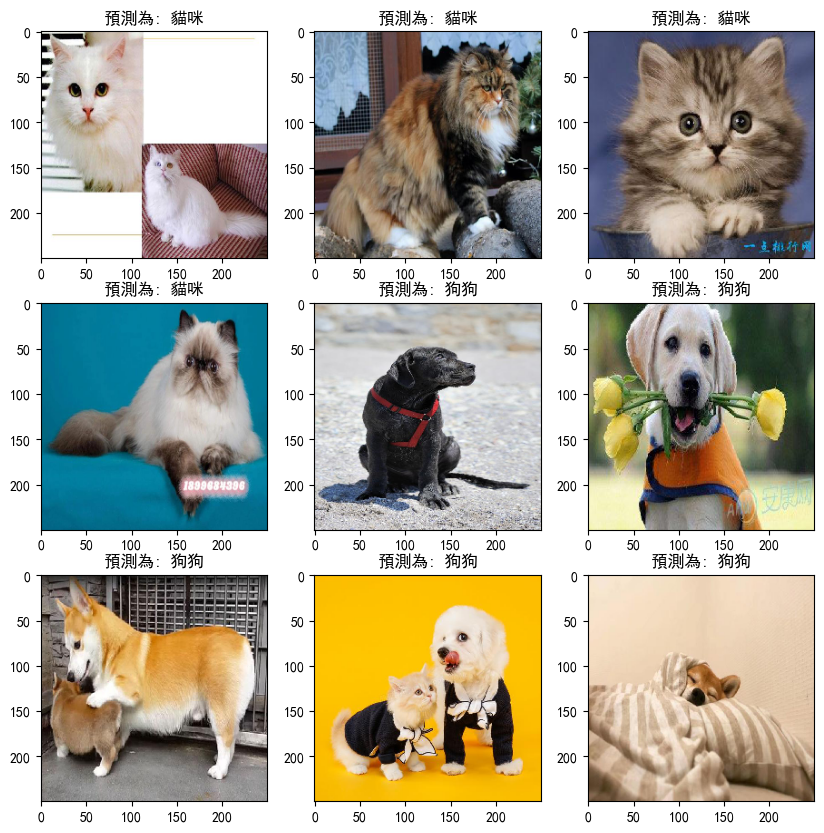

In [13]:
# make prediction on multiple images
# 多張圖片的預測
import matplotlib as mlp
font2 = {
    'family': 'SimHei',
    'weiight': 'normal',
    'size': 20
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils.image_utils import load_img, img_to_array
from keras.models import load_model

fig = plt.figure(figsize=(10,10))
a = [i for i in range(1,10)]
for i in a:
    img_name = './dataset/test/{i}.jpg'.format(i=i)
    img_ori = load_img(img_name,target_size=(224,224))
    img = img_to_array(img_ori)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model_vgg.predict(x)
    x_vgg = x_vgg.reshape(1,7*7*512)
    result = np.around(model.predict(x_vgg))
    img_ori = load_img(img_name,target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('預測為: 狗狗' if result[0][0] == 1 else '預測為: 貓咪')
plt.show()

基於VGG16、結合mlp實現貓狗識別圖像實戰summary:
1. 基於經典的VGG16結構，實現了圖像識別模型的快速搭建與訓練，並完成貓狗識別任務
1. 掌握了拆分已經訓練好的模型結構的方法，實現對其靈活應用
1. 更熟練的運用mlp模型，並將其與其他模型相結合，實現更複雜的任務
1. 通過VGG16+mlp的模型，實現了在小數據集情況下的模型快速訓練並獲得較高的準確率